In [1]:
from sklearn import metrics
import pandas as pd
import numpy as np

from discretization.sax.adaptive_sax import AdaptiveSAX, eval_k_means
from approximation.paa import PAA
from utils import load_parquet_to_df_list, z_normalize
from discretization.sax.symbol_mapping import IntervalNormMedian
from graphics import plot_internal_clustering_metrics

In [2]:
# load time series dataset into dataframe and z-normalize it
path = "../../../0_data/UCRArchive_2018/SwedishLeaf/train"
df_list = load_parquet_to_df_list(path)

# concatenate all time series to one list, because they have all the same length
# only select columns with data ('signal') and ignore class labels ('pattern_main_id')
df_norm = pd.concat([z_normalize(df["signal"].to_frame()) for df in df_list], axis=1).iloc[:, :2]

In [3]:
paa = PAA(window_size=8)
df_paa = paa.transform(df_norm)
df_paa

,signal,signal
0,1.582645,1.337283
1,0.358845,0.354893
2,-0.515049,-0.099386
3,-0.912210,-0.492618
4,-1.096569,-1.444889
5,-0.749838,-1.292861
6,0.092439,0.053426
7,1.198148,1.420859
8,1.545157,1.327011
9,0.218167,-0.043832


In [4]:
eval_results = eval_k_means(df_paa, min_alphabet_size=2, max_alphabet_size=10)

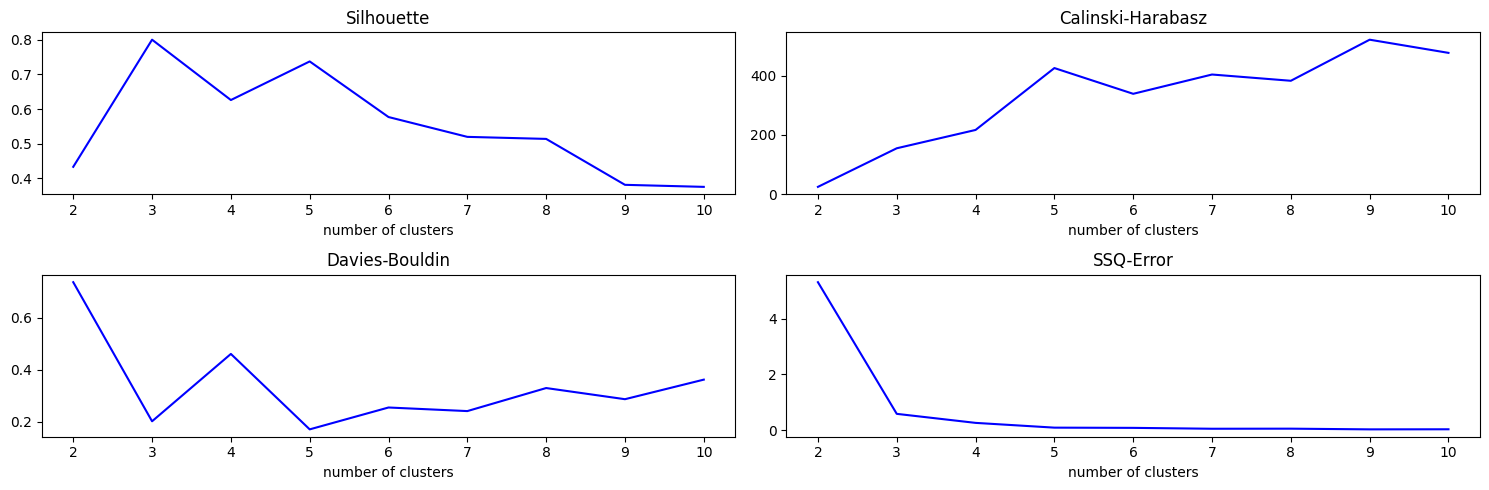

In [5]:
# plot evaluation results of second time series
plot_internal_clustering_metrics(silhouette=eval_results[1,1],calinski_harabasz=eval_results[1,2], davies_bouldin=eval_results[1,3],
                                 num_clusters_min=2, ssq_error=eval_results[1,0])